In [246]:
import pandas as pd
from pandas import read_csv
import numpy as np
import scipy as sp
import matplotlib as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import seaborn as sbs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Evaluate using Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [247]:
#El fragmento siguiente carga el conjunto de datos de inicio de diabetes de los indios Pima
#Link a los datos https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [248]:
#Nos entrega un resumen estadístico rápido de cada una de las variables (deben ser numéricas)
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [249]:
#Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

SyntaxError: invalid syntax (<ipython-input-249-f85394583cec>, line 3)

In [ ]:
df.shape

In [250]:
#forma rapida de contar los valores nuloes o "missin values" en las variables como %
round(100*(df.isnull().sum()/1000000))

preg     0.0
plas     0.0
pres     0.0
skin     0.0
test     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

In [251]:
#Comenzamos el análisis univariante gráficando un histograma para entender las distribuciones
#de cada variable usando visualización. (solo sirve para platear hipótesis por si solo)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1184e0358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118771e80>]], dtype=object)

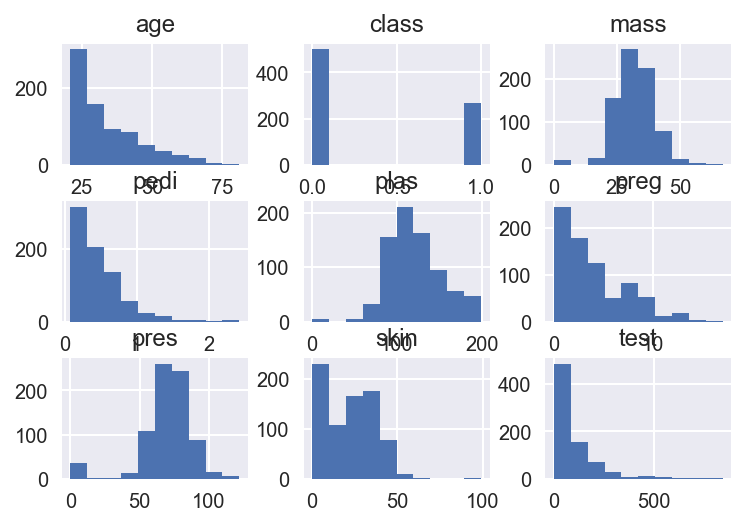

In [252]:
#Pareciera ser que estamos en presencia de distribuciones normales, normales con sesgo 
#y exponencial. Veremos si esto efectivamente es así más adelante
df.hist()

In [253]:
#COmenzamos con el análisis univariante y multivariante con respectoa la variable target, para luego continuar con el
#análisis multivariante entre las disitinstas variables explicativas.

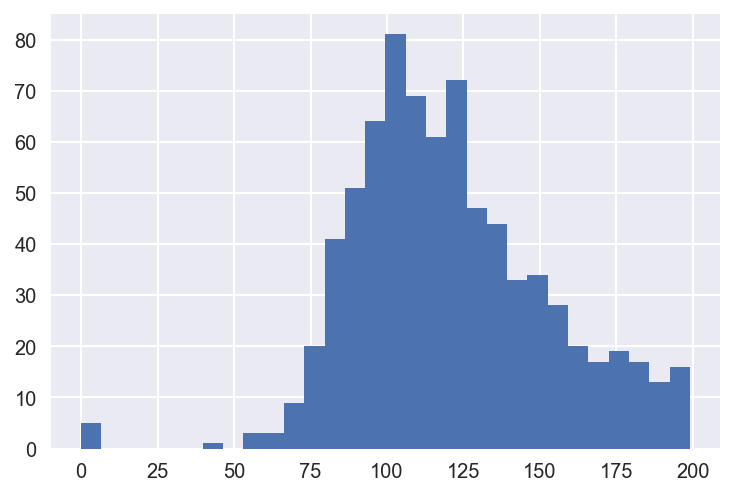

In [254]:
#1.-Análsis de la variable plas.
#Variable númerica con valores entre 0 y 199 que representa la concentración de plasma glucoso a 2 horas en un test de 
#tolerancia a la glucosa oral. Debemos cuestionar si es que los valores 0 corresponde a valores NA o de test fallidos.
#Con respectoa a la distribución de la variable, podemos decir que se ve como una normal con sesgo a la derecha.
#De hecho, su media es casi igual a la mediana y el la media se encuentra 20% más cercana al valor máximo en un rango 
#de 199.Adicionalmente,podemos ver muy pocos valores entre 0 y 99 (solo un 25%), mientras que el 75%
#de los valores se encuentra en el intervalo cercano al máximo del rango.
df.plas.hist(bins=30)

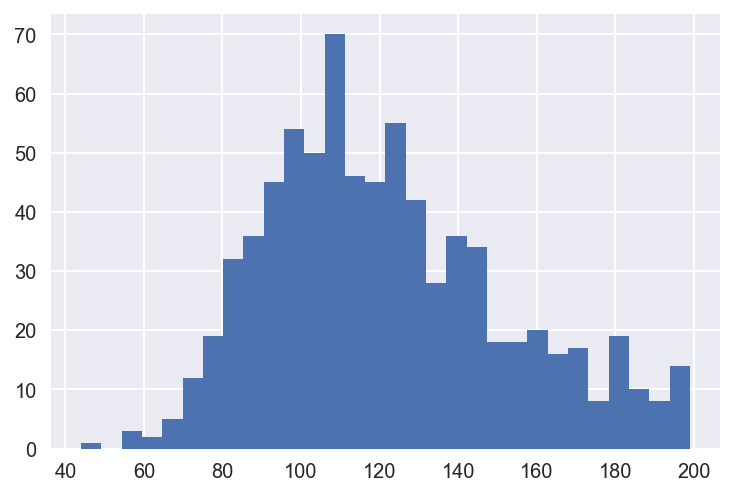

In [255]:
#eliminando los valores 0 vemos que el histograma se parece más a una normal con sesgo a la derecha, una erlang o Gamma
df[df['plas']>0].plas.hist(bins=30)

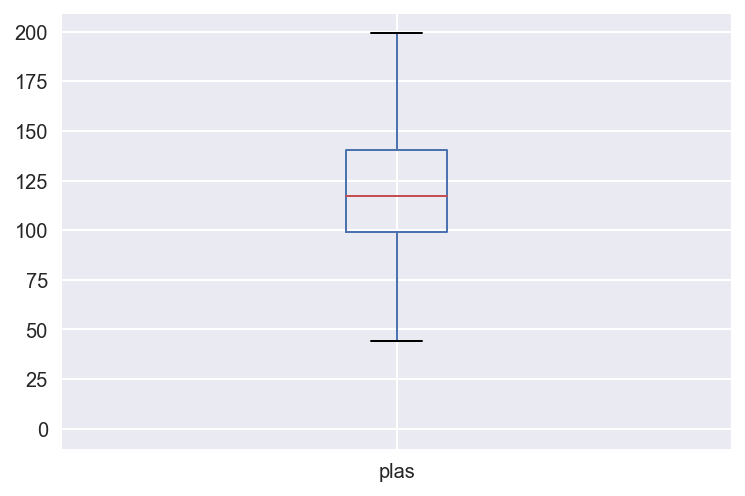

In [256]:
#El boxplot nos confirma lo que enunciamos anteriormente, que el 50% de la data se encuentra sobre el valor 100
df.boxplot(column='plas')

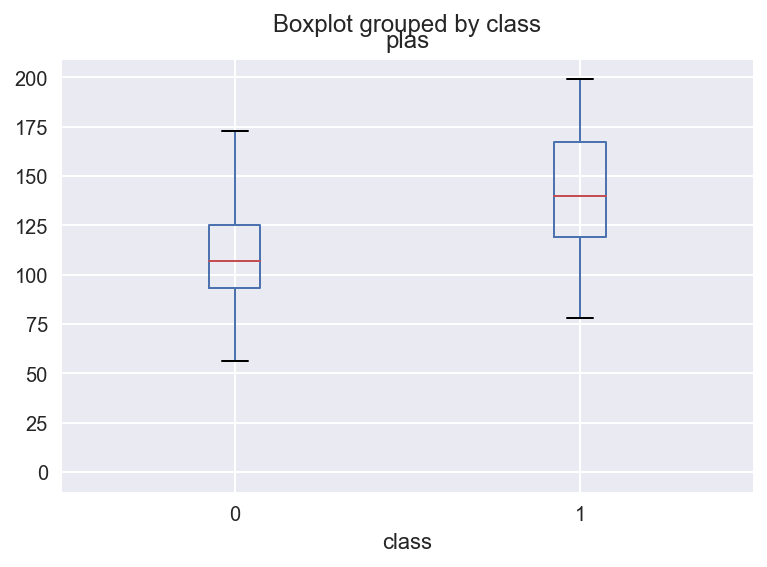

In [257]:
#Adicionalmente podemos ver que esta tendencia se mantiene cuando revisamos el boxplot para plas según clase. Podemos
#ver también que enla clase 0 el 50% de los datos centrales están contenidos en un rango menor al de la clase 1, lo
#que es equivalente a decir que se espera una mayor desviación de la media para los valores plas en la clase 0 que en
#la 1, tal y como podemos observar en el cuadro que mostramos más abajo con las medidas de tendencia central de plas 
#por clase
df.boxplot(column='plas',by='class')

In [258]:
df.groupby('class')['plas'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


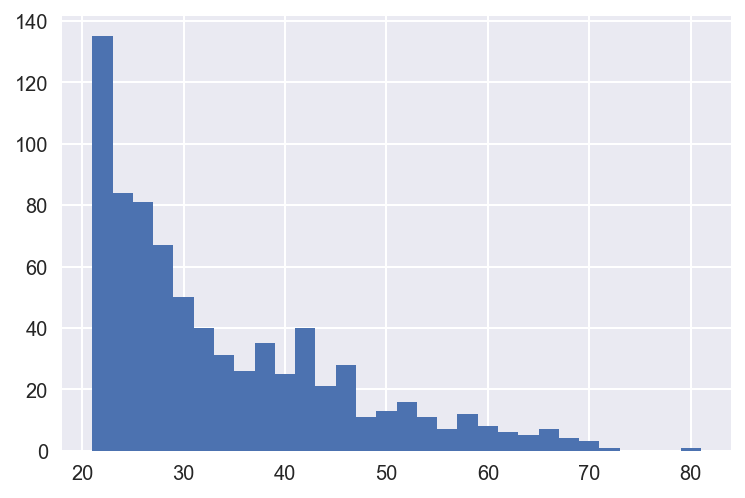

In [259]:
#Como podemos ver,la edad tiene una distribución exponencial,la cual parte desde los 21 años hasta un máximo de 81 años.
#es claro 
df['age'].hist(bins=30)

In [260]:
plotly.tools.set_credentials_file(username='ilinker', api_key='fXcCnCdQtQ8OMF4r19Va')

In [346]:
#Vamos. a usar plotly para dejar en evidencia la concentración de la edad en las personas entre 21 y 30
trace = go.Histogram(x=df['age'], xbins=dict(start=np.min(df['age']), size=5, end=np.max(df['age'])),
                   marker=dict(color='rgb(0, 0, 100)'))

layout = go.Layout(
    title="Histogram Frequency Counts Age of Indios-Pima"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
py.iplot(fig, filename='histogram-freq-counts-age-Indios-Pima')

In [262]:
#cumfreqs, lowlim, binsize, extrapoints = sp.stats.cumfreq(df['age'], numbins=6)
#counts = df['age'].value_counts()

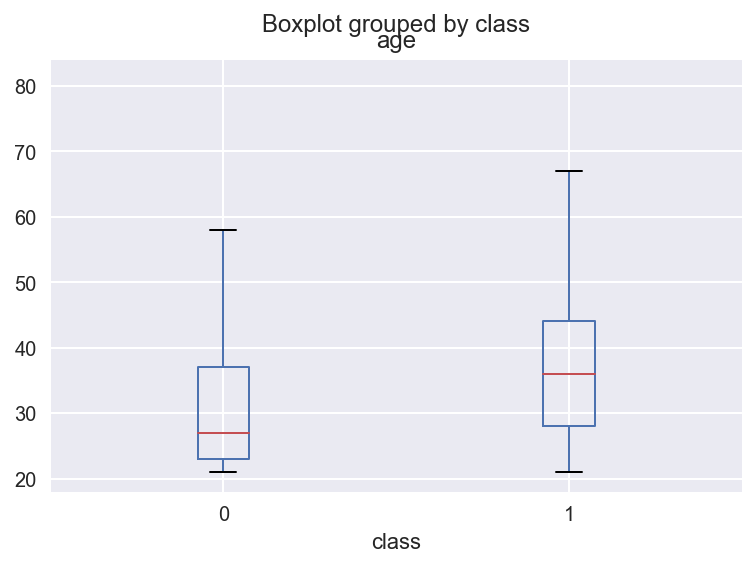

In [263]:
#Podemos obersvar que los datos de edad distribuyen distinto según clase.Vemos que 
df.boxplot(column='age',by='class')

In [264]:
df.groupby('class')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


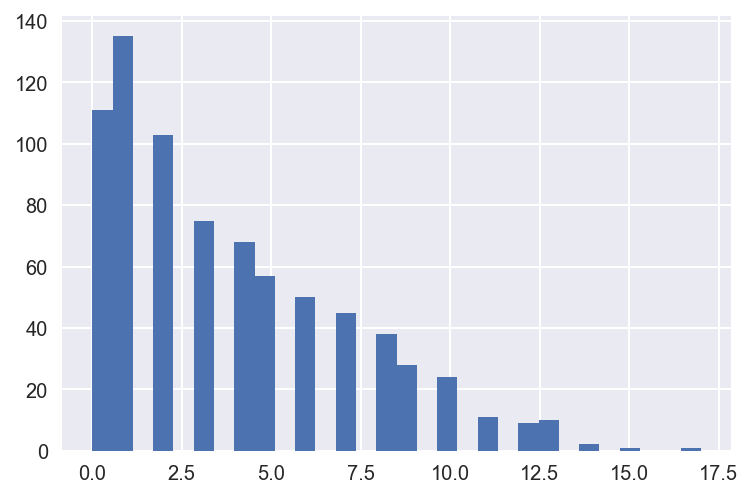

In [265]:
df['preg'].hist(bins=30)

In [266]:
#Como podemos ver, más del 50% de los valores está concentrado entre 0 y 3 veces, y existe una clara predominancia de
#personas sin diabetes hasta los 7 embarazos, en donde se invierte la proporción.
contingencyTable = pd.crosstab(index=df['class'],columns=df['preg'],margins=True)
contingencyTable

preg,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,All
class,,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0,500
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1,268
All,111,135,103,75,68,57,50,45,38,28,24,11,9,10,2,1,1,768


In [267]:
#Acá podemos ver de forma más clara el punto de inflexión en el número de embarazos. Es posible pensar entonces en una
#transformación de variable en la cual agrupamos las categorías en función de su relación con class.Para ello primero
#usaremos el test chi-2 para testear independencia
contingencyTable = pd.crosstab(index=df['class'],columns=df['preg'],margins=True, normalize='columns')
contingencyTable

preg,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,All
class,,,,,,,,,,,,,,,,,,
0,0.657658,0.785185,0.815534,0.64,0.661765,0.631579,0.68,0.444444,0.421053,0.357143,0.583333,0.363636,0.555556,0.5,0.0,0.0,0.0,0.651042
1,0.342342,0.214815,0.184466,0.36,0.338235,0.368421,0.32,0.555556,0.578947,0.642857,0.416667,0.636364,0.444444,0.5,1.0,1.0,1.0,0.348958


In [268]:
df[['preg']]=df.preg.map({0:0,1:0,2:0,3:0,4:0,5:0,6:1,7:1,8:1,9:1,10:1,11:1,12:1,13:1,14:1,15:1,16:1,17:1})
list(df['preg'].unique())

[1, 0]

In [269]:
contingencyTable = pd.crosstab(index=df['class'],columns=df['preg'],margins=True)
contingencyTable

preg,0,1,All
class,,,
0,392,108,500
1,157,111,268
All,549,219,768


In [270]:
contingencyTable = pd.crosstab(index=df['class'],columns=df['preg'],margins=True, normalize='columns')
contingencyTable

preg,0,1,All
class,,,
0,0.714026,0.493151,0.651042
1,0.285974,0.506849,0.348958


In [348]:
#Vamos. a usar plotly para dejar en evidencia la concentración de la edad en las personas entre 21 y 30
trace = go.Histogram(x=df['pres'], xbins=dict(start=np.min(df['pres']), size=5, end=np.max(df['pres'])),
                   marker=dict(color='rgb(0, 0, 100)'))

layout = go.Layout(
    title="Histogram Frequency Counts pres of Indios-Pima"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
py.iplot(fig, filename='histogram-freq-counts-pres-Indios-Pima')

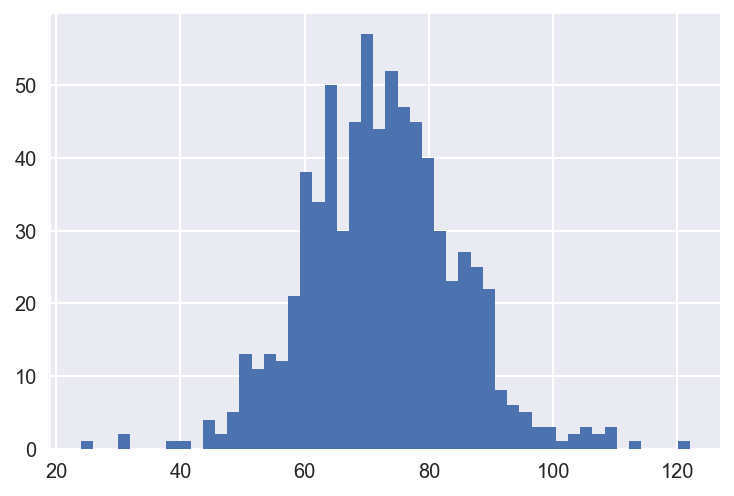

In [358]:
df[df['pres']>0]['pres'].hist(bins=50)

In [360]:
#La media está centrada y la distribución se parece mucho a una normal
df[df['pres']>0].groupby('class')['pres'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,481.0,70.877339,12.161223,24.0,62.0,70.0,78.0,122.0
1,252.0,75.321429,12.299866,30.0,68.0,74.5,84.0,114.0


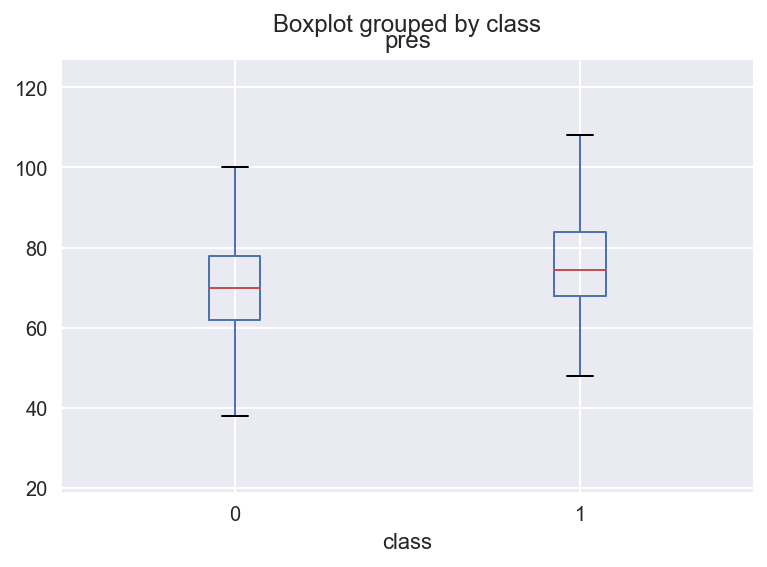

In [350]:
#Podemos obersvar que los datos de edad distribuyen distinto según clase.Vemos que 
df[df['pres']>0].boxplot(column='pres',by='class')

In [361]:
#Vamos. a usar plotly para dejar en evidencia la concentración de la edad en las personas entre 21 y 30
trace = go.Histogram(x=df['skin'], xbins=dict(start=np.min(df['skin']), size=5, end=np.max(df['skin'])),
                   marker=dict(color='rgb(0, 0, 100)'))

layout = go.Layout(
    title="Histogram Frequency Counts skin of Indios-Pima"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
py.iplot(fig, filename='histogram-freq-counts-skin-Indios-Pima')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e0534e0>]], dtype=object)

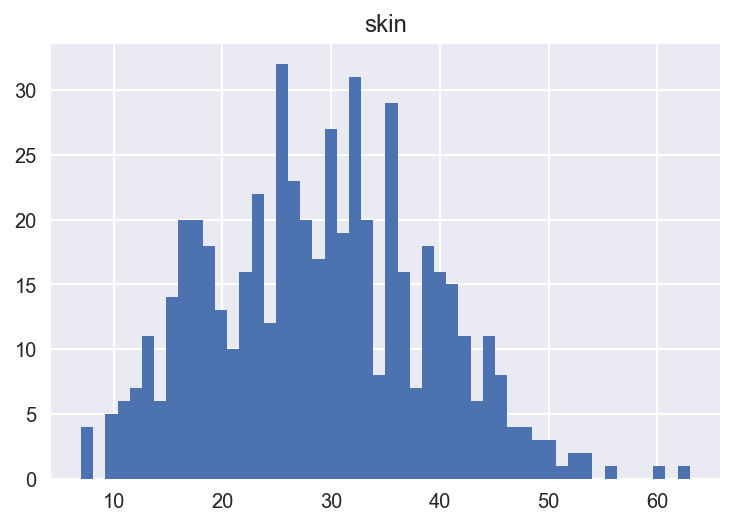

In [379]:
df.loc[(df.skin<70) & (df.skin >0), ['skin']].hist(bins=50)

In [381]:
#La media está centrada, pero no se parece mucho a una normal
df.loc[(df.skin<70) & (df.skin >0), ['skin','class']].groupby('class')['skin'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,361.0,27.235457,10.026491,7.0,19.0,27.0,33.0,60.0
1,179.0,32.631285,9.091194,7.0,27.0,32.0,39.0,63.0


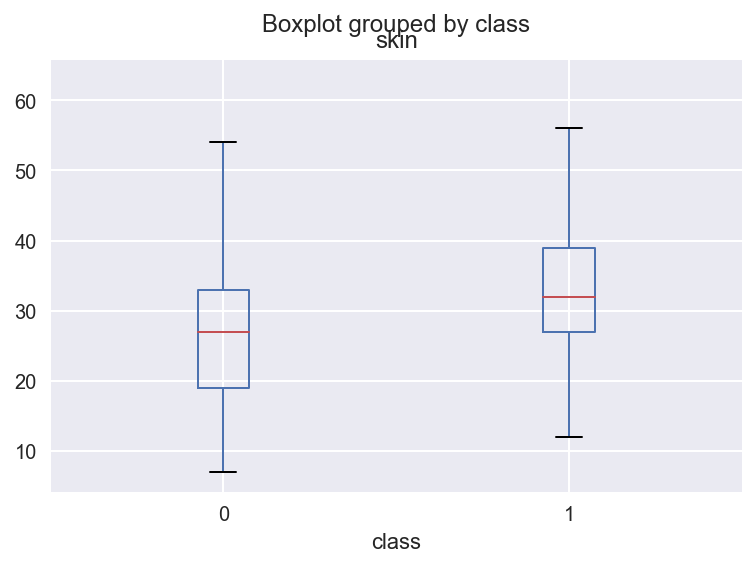

In [382]:
#Podemos obersvar que los datos de edad distribuyen distinto según clase.Vemos que 
df.loc[(df.skin<70) & (df.skin >0), ['skin','class']].boxplot(column='skin',by='class')

In [271]:
#Test chi-2: Es un test que busca probar la independencia entre variables.
#Referencias:
#http://hamelg.blogspot.cl/2015/11/python-for-data-analysis-part-25-chi.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
#https://www.slideshare.net/armando310388/prueba-chicuadrado

In [336]:
def expected_values(var1,var2):
    contingencyTable = pd.crosstab(index=var1,columns=var2,margins=True)
    expected =  np.outer(contingencyTable.iloc[0:(len(contingencyTable.index)-1)]['All'],
                         contingencyTable.loc["All"][0:(len(contingencyTable.columns)-1)]/contingencyTable.loc["All"]['All'])
    expected = pd.DataFrame(expected)
    expected.columns = contingencyTable.columns[0:(len(contingencyTable.columns)-1)]
    expected.index = contingencyTable.index[0:(len(contingencyTable.index)-1)]
    return expected

def chi2_test(var1,var2,alpha):
    #Creamos la tabla de contingencia con los valores totales
    contingencyTable = pd.crosstab(index=var1,columns=var2,margins=True)
    #Creamos la tabla de valores esperados
    expected =  np.outer(contingencyTable.iloc[0:(len(contingencyTable.index)-1)]['All'],
                         contingencyTable.loc["All"][0:(len(contingencyTable.columns)-1)]/contingencyTable.loc["All"]['All'])
    expected = pd.DataFrame(expected)
    expected.columns = contingencyTable.columns[0:(len(contingencyTable.columns)-1)]
    expected.index = contingencyTable.index[0:(len(contingencyTable.index)-1)]
    #Creamos la tabla de contingencia sin los valores totales
    contingencyTable = pd.crosstab(index=var1,columns=var2)
    #calculamos el valor calculado de chi2
    chi_squared_stat = (((contingencyTable-expected)**2)/expected).sum().sum()
    #calculamos los grados de libertad
    dof=(len(contingencyTable.columns)-1)*(len(contingencyTable.index)-1)
    #calculamos el valor crítico de chi2
    crit = sp.stats.chi2.ppf(q = alpha,df = dof)
    #calulamos el p-valor
    p_value = 1 - sp.stats.chi2.cdf(x=chi_squared_stat,df=dof)
    #testeamos la hipótesis nula de independencia entre las variables
    if(chi_squared_stat<=crit):
        print("se acepta H0, los valores son independientes y el p-valor es: "+str(p_value))
        print("los valores esperados son: "+ str(expected))
    else:
        print("Se rechaza H0, no hay evidencia para decir que los valores son independientes y el p-valor es: "+str(p_value))
        print("los valores esperados son:"+ str(expected))

In [337]:
chi2_test(df['class'],df['preg'],0.99)

Se rechaza H0, no hay evidencia para decir que los valores son independientes y el p-valor es: 6.70867938979e-09
los valores esperados son:preg            0           1
class                        
0      357.421875  142.578125
1      191.578125   76.421875


In [342]:
#Recordemos que el test X2 tiene como hipótesis nula-->H0:La variable class es independiente de preg
#El output entrega el valor del estadístico chi-2, el valor p, los grados de libertad y un arreglo con los valores
#esperados.Como podemos ver, en este caso no se acepta H0,ya que el p-valor es menor que 0.05, lo que significa que el
#x2 calculado es mayor que el estadístico x2. En consecuencia existe una relación entre class y preg
contingencyTable = pd.crosstab(index=df['class'],columns=df['preg'])
sp.stats.chi2_contingency(observed=contingencyTable,correction=False)
#Al agregar el parámetro correction como falso le estamos pidiendo que no aplique la corrección de Yates

(33.617489842500945,
 6.7086793772820514e-09,
 1,
 array([[ 357.421875,  142.578125],
        [ 191.578125,   76.421875]]))

In [338]:
#Comenzamos el análisis multivariante entre las variables usando las correlaciones de Pearson
#Es importante notar que las correlaciones de Pearson son solo válidas entre variables númericas y no entre variables
#cuya naturaleza sea categórica, como preg o class. Si bien sus valores están expresados de forma númerica, estos re-
#presentan una categoría y no un valor númerico.
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.138378,0.107036,-0.053998,-0.049233,0.004695,-0.003744,0.505075,0.209219
plas,0.138378,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.107036,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.053998,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.049233,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.004695,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.003744,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.505075,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.209219,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


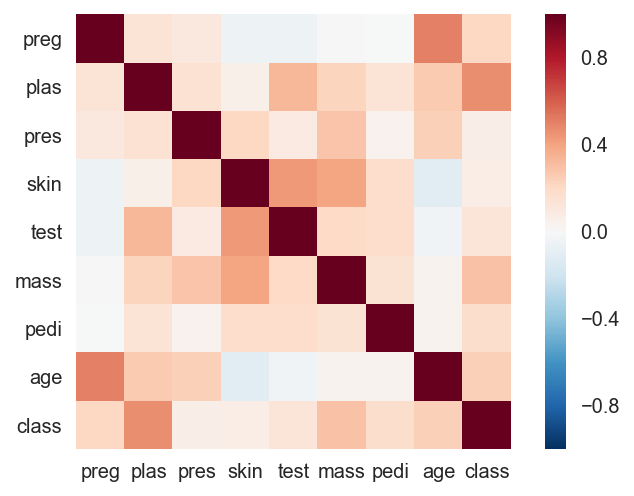

In [343]:
#Vemos una correlación fuerte en la medida que los colores se van haciendo más oscuros
#Centraremos los análisis en estudiar aquellas correlaciones más oscurecidas, en particular:
#Entre Skin y mass,pres y mass,age y pedi,plas y test,test y skin.
cm=df.corr()
sbs.heatmap(cm,square=True)

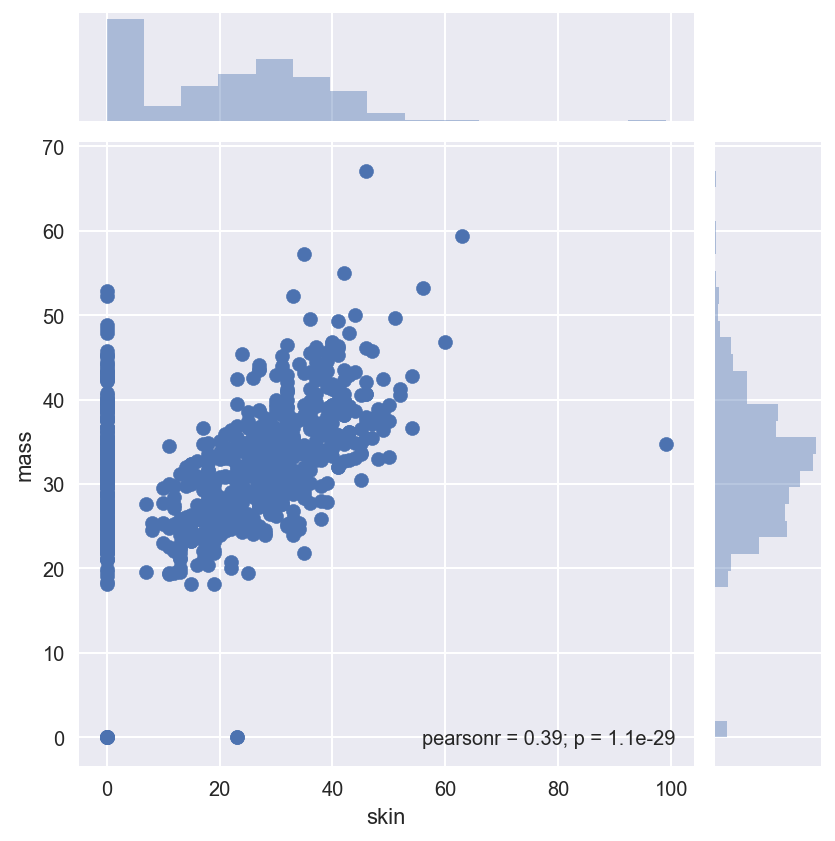

In [14]:
#Es evidente que las variables skin y mass tienen una alta correlación y que está subestimada debido a los valores 0
#de skin y mass que son valores fuera de rango.Veremos que pasa lo mismo con pres y mass,plas y test, skin y test.
sbs.jointplot(df["skin"], df["mass"])

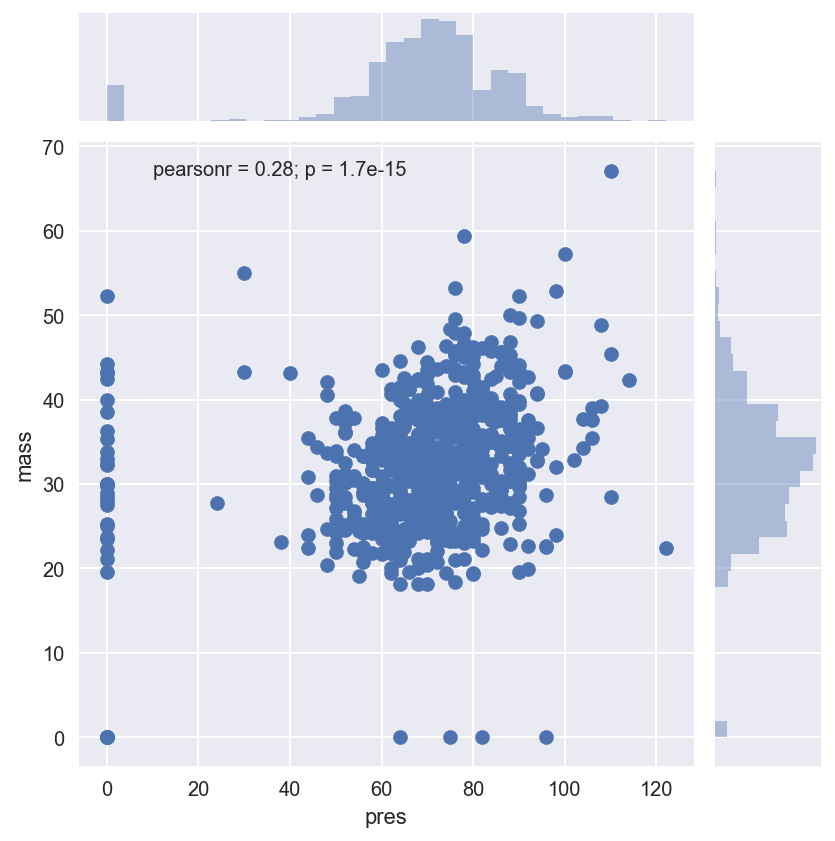

In [15]:
sbs.jointplot(dataframe["pres"], dataframe["mass"])

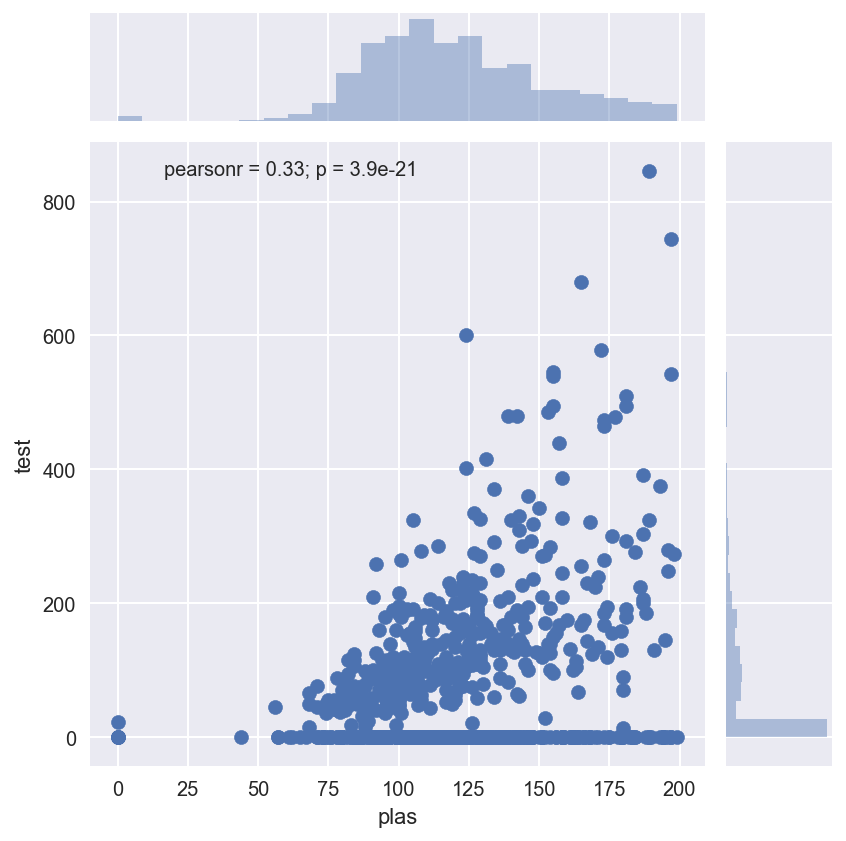

In [17]:
sbs.jointplot(dataframe["plas"], dataframe["test"])

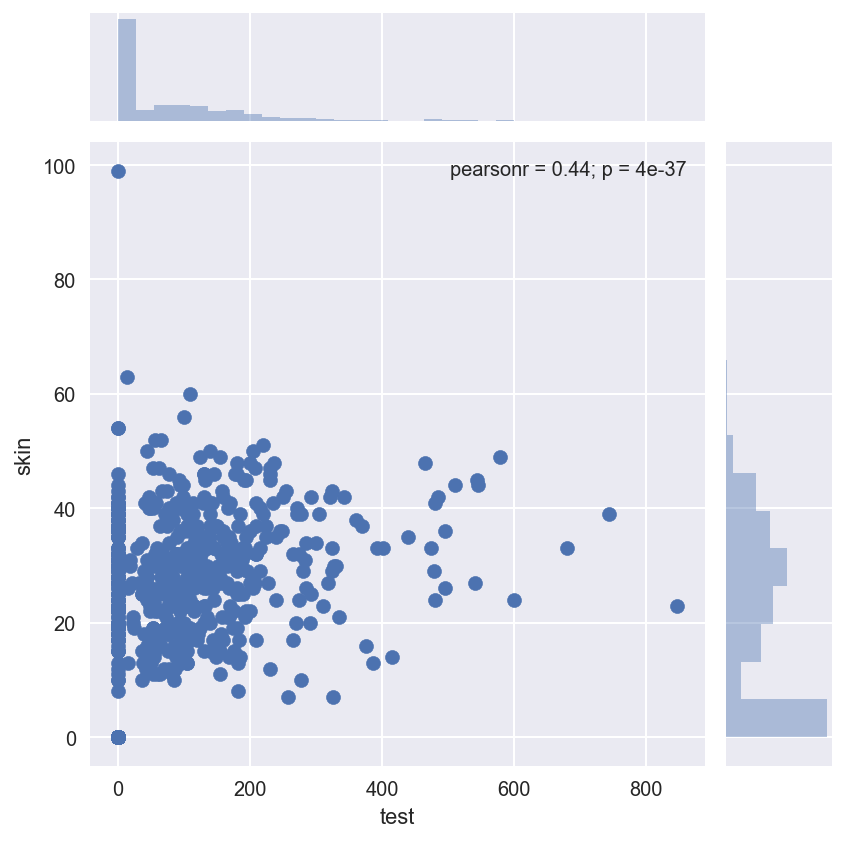

In [18]:
sbs.jointplot(dataframe["test"], dataframe["skin"])

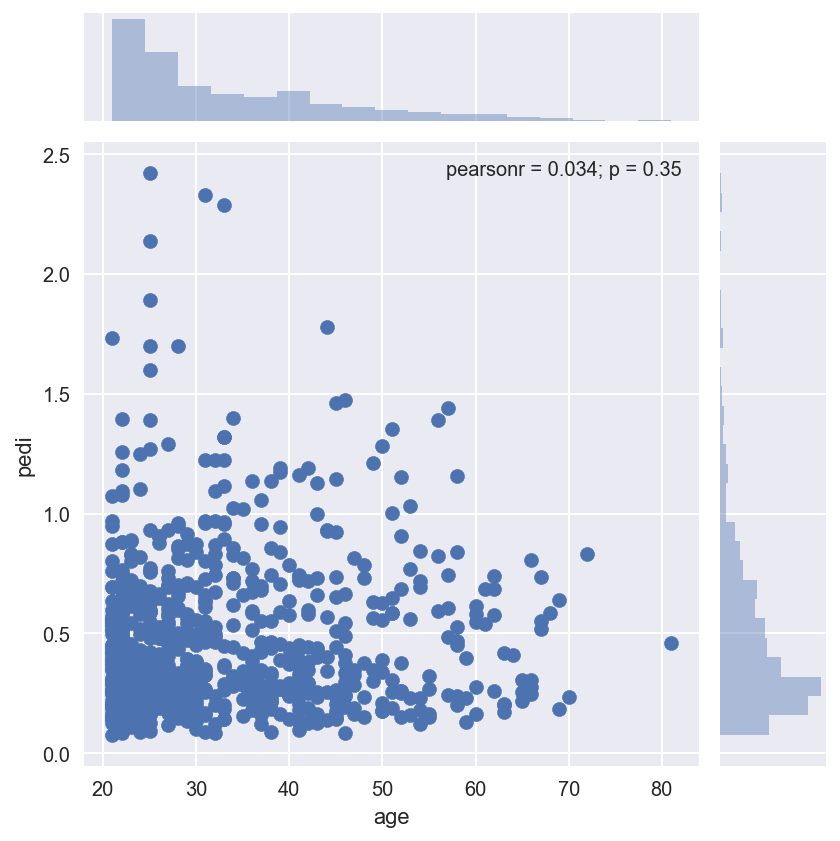

In [16]:
sbs.jointplot(dataframe["age"], dataframe["pedi"])

In [ ]:
#En proceso aún:
#Debemos definir qué hacer con los valores 0 de las variables
#Debemos estudiar las relaciones entre variables con los cambios
#Definimos

In [19]:
#Ahora usaremos con los test chi-2 para aquellas variables que son categóricas

In [20]:
#Pre-procesamiento de la data usando la libreria scikit-learn, el cual provee dos lenguajes distintos para preprocesar
#la data, los cuales son útiles en distintos contextos:Fit and Multiple Transform.
#Combinaremos Fit-And-Transform para realizar las siguientes tareas:
#Estandarizar la data númerica (e.g. promedio de 0 y desviación estandar de 1) usando las opciones scale and center
#Normalizar la data númerica (e.g. a un rango de 0-1) usando la opción de rango (range)
#Explorar un feature engineering más avanzado como Binarizing, que transforma a binario
#For example, the snippet below loads the Pima Indians onset of diabetes dataset, calculates the parameters needed 
#to standardize the data, then creates a standardized copy of the input data.

In [21]:
#Separamos el arreglo en inputs y outputs, o bien variables explicativas y target
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [22]:
#Tarea 1a: Estandarizar los datos usado scale
#Calcula los parámetros necesarios para estandarizar los datos
scaler = StandardScaler().fit(X)
#crea una copia estandarizada de los datos de entrada
rescaledX = scaler.transform(X)
#obtenemos un print entendible de las 5 primeras filas de la data transformada usando el comando set_printoptions
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.set_printoptions.html
#https://stackoverflow.com/questions/2891790/how-to-pretty-printing-a-numpy-array-without-scientific-notation-and-with-given
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [ ]:
#Tarea 1b: Estandarizar la data númerica usando center (in progress)

In [ ]:
#Modelos de predicción
#Usaremos modelos de regresión logística y lineal primero, haciendo énfasis en la dificultad de usar adecuadamente estos
#modelos dado la gran cantidad de supuestos que se deben cumplir. Posteriormente usaremos SVM y Random Forest. 
#y generaremos una comparación con los modelos de black box.

In [26]:
#Hacemos una regresión logística usando los datos sin el pre-procesamiento y la técnica de crossvalidation 10-kfold 
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") + str(results.mean()*100.0) + str(results.std()*100.0))

Accuracy: %.3f%% (%.3f%%)76.9514695834.84105192457


In [27]:
#Hacemos la regresión logística usando los datos con el pre-procesamiento y la técnica de crossvalidation 10-kfold
#Vemos un incremento en la métrica de precisión de un 1.04 puntos porcentuales con un incremento en la desviación de
#0.16 puntos porcentuales.Este incremento es marginal y nos indica que debemos trabajar mejor en el feature engineering
#si lo que queremos es lograr mayor precisión.
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") + str(results.mean()*100.0) + str(results.std()*100.0))

Accuracy: %.3f%% (%.3f%%)77.99555707455.0088006076


In [28]:
#Lo que contiene results son las métricas de precisión para cada uno de los 10 data set en donde se testeo el modelo
#lo que se muestra como resultado en ambos modelos anteriores es el promedio y desviación de estos resultados.Es impor-
#tante entender el rango en el que se mueven, pues podemos ver que la mínima precisión fue de 69% y la máxima de 83%.
#Si no estamos dispuestos a tolerar la posibilidad de un 68% de precisión, entonces no podemos usar este modelo.
results

array([ 0.688,  0.831,  0.766,  0.701,  0.779,  0.792,  0.844,  0.831,
        0.763,  0.803])

In [83]:
dataframe.columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'clas']

In [68]:
#Usaremos la libreria patsy para crear el modelo de regresión logística con matrices
from patsy import dmatrices
f='clas ~ C(preg) + plas + pres + skin + test + mass + pedi + age'

In [70]:
Y,X= dmatrices(formula_like=f,data=dataframe, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(preg)[T.1]', 'C(preg)[T.2]', 'C(preg)[T.3]',
       'C(preg)[T.4]', 'C(preg)[T.5]', 'C(preg)[T.6]', 'C(preg)[T.7]',
       'C(preg)[T.8]', 'C(preg)[T.9]', 'C(preg)[T.10]', 'C(preg)[T.11]',
       'C(preg)[T.12]', 'C(preg)[T.13]', 'C(preg)[T.14]', 'C(preg)[T.15]',
       'C(preg)[T.17]', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'],
      dtype='object')


In [73]:
#Ahora usaremos un simple split en 70-30 para contrastar
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/Users/iairlinker/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
#Generamos la predicción sobre el dataset de test utilizando el modelo
predicted = model2.predict(X_test)
#generamos las probabilidades para el conjunto de test
probs = model2.predict_proba(X_test)

In [79]:
#mostramos las métricas de evaluación correspondiente a la precisión y el auc score. La primera nos entrega el mismo
#resultado que con la data estandarizada y usando 10k-fold y el segundo es un buen resultado del auc score.
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.779220779221
0.814167670856


In [80]:
#Mostramos la matriz de confusión donde las filas son, de arriba hacia abajo,personas que no tendrán inicio de diabetes 
#y personas que si,y las columnas son mi prección que va de izquierda a derecha personas que no tendrán inicio de 
#diabetes y personas que si
print(metrics.confusion_matrix(y_test, predicted))

[[142  15]
 [ 36  38]]


In [82]:
#Finalmente desplegamos un resumen de las métricas donde podemos obersvar que el gran deficit es el recall para la
#predicción de 1,es decir las personas que si tendrán inicio de diabetes pero yo predigo que no lo harán.
#En el contexto de este análisis esto es un resultado malo ya que dejaré de darles el tratamiento preventivo a un 50%
#de las personas.
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       0.80      0.90      0.85       157
        1.0       0.72      0.51      0.60        74

avg / total       0.77      0.78      0.77       231

